In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Flatten

Using TensorFlow backend.


In [2]:
# Answer 1

# Loading up the csv file
stock_prices_df = pd.read_csv('prices.csv')  

In [3]:
# Checking that the dataframe is initialised correctly
stock_prices_df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
# Checking the number of rows and columns
stock_prices_df.shape

(851264, 7)

In [5]:
# Checking the info
stock_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
date      851264 non-null object
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [6]:
# Checking statistical summary
stock_prices_df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,851264.0,7.083699e+01,8.369588e+01,0.85,3.384000e+01,5.277000e+01,7.988000e+01,1.584440e+03
close,851264.0,7.085711e+01,8.368969e+01,0.86,3.385000e+01,5.280000e+01,7.989000e+01,1.578130e+03
low,851264.0,7.011841e+01,8.287729e+01,0.83,3.348000e+01,5.223000e+01,7.911000e+01,1.549940e+03
high,851264.0,7.154348e+01,8.446550e+01,0.88,3.419000e+01,5.331000e+01,8.061000e+01,1.600930e+03
volume,851264.0,5.415113e+06,1.249468e+07,0.00,1.221500e+06,2.476250e+06,5.222500e+06,8.596434e+08


In [7]:
# All the features show a similar distribution - the mean values > median which implies a tail on the right. 
# There is a significant difference between min and max values.
# The values of volume are far greater than those of other columns.

In [8]:
# Checking co-relations
stock_prices_df.corr()

,open,close,low,high,volume
open,1.000000,0.999849,0.999916,0.999930,-0.059950
close,0.999849,1.000000,0.999928,0.999927,-0.060154
low,0.999916,0.999928,1.000000,0.999892,-0.060760
high,0.999930,0.999927,0.999892,1.000000,-0.059452
volume,-0.059950,-0.060154,-0.060760,-0.059452,1.000000


In [9]:
# Open, close, low and high are highly co-related with each other and also with the target.
# Volume does not have a strong relation with any other feature or target.

In [10]:
# Answer 2

# Checking for null values
stock_prices_df.isnull().values.any()

False

In [11]:
# There are no null values to drop.

In [12]:
# Answer 3

# Dropping string types and low co-relation columns
stock_prices_df = stock_prices_df.drop(['date','symbol','volume'], axis=1)

In [13]:
# Checking the shape again
stock_prices_df.shape

(851264, 4)

In [14]:
# Answer 4

# Separating features from target variable
X = stock_prices_df.drop('close', axis=1)
y = stock_prices_df['close']

print(X.shape, y.shape)

(851264, 3) (851264,)


In [15]:
# Answer 5

# Splitting the data into train and test
test = 0.3
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=seed)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(595884, 3) (595884,) (255380, 3) (255380,)


In [16]:
# Answer 6

# Scaling the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Answer 7

# Converting features and labels into numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [18]:
# Answer 8

# Reshaping the features for input in the neural network model 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape, X_test.shape)

(595884, 3, 1) (255380, 3, 1)


In [19]:
# Answer 9

# Defining the sequential model
model = Sequential()
model.add(Flatten())
model.add(Dense(1, activation='linear'))

In [20]:
# Answer 10

# Compiling the model
model.compile(optimizer='sgd', loss='mean_squared_error')

In [21]:
# Model summary is printed after model fitting and evaluation

In [22]:
# Answer 12

# Fitting the model on train data
model.fit(X_train, y_train, epochs=50, batch_size=128)

Epoch 1/50
595884/595884 [==============================] - 9s 14us/step - loss: 41.0682 0s - loss:
Epoch 2/50
595884/595884 [==============================] - 7s 12us/step - loss: 0.9611
Epoch 3/50
595884/595884 [==============================] - 8s 14us/step - loss: 0.9548
Epoch 4/50
595884/595884 [==============================] - 8s 14us/step - loss: 0.9462
Epoch 5/50
595884/595884 [==============================] - 8s 14us/step - loss: 0.9409
Epoch 6/50
595884/595884 [==============================] - 8s 14us/step - loss: 0.9339
Epoch 7/50
595884/595884 [==============================] - 8s 14us/step - loss: 0.9265
Epoch 8/50
595884/595884 [==============================] - 7s 12us/step - loss: 0.9207
Epoch 9/50
595884/595884 [==============================] - 7s 11us/step - loss: 0.9170
Epoch 10/50
595884/595884 [==============================] - 8s 14us/step - loss: 0.9098
Epoch 11/50
595884/595884 [==============================] - 9s 16us/step - loss: 0.9021
Epoch 12/50
595884

In [23]:
# Answer 13

# model.metrics_names = 'Loss' for this dataset
# Evaluating the model on test data
loss = model.evaluate(X_test, y_test)
print('Loss on test: ', loss)

# Predicting the output on test data
y_pred_test = model.predict(X_test)

# Calculating the root mean squared error on train data
y_pred_train = model.predict(X_train)
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE on train: ', rmse_train)

# Calculating the root mean squared error on test data
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE on test: ', rmse_test)

255380/255380 [==============================] - 6s 23us/step
Loss on test:  0.7452197583245077
RMSE on train:  0.8414695399683783
RMSE on test:  0.8632611278628417


In [24]:
# The difference between RMSE of train and test data is not too high, this implies that our model does not overfit.
# Also, as the target variables are not scaled, they have a wide range of 0.86 going up to 1578. With respect to this scale,
# RMSE is quite low (Ref: https://stats.stackexchange.com/questions/56302/what-are-good-rmse-values).
# We can confirm this by comparing some actual and predicted values.

            Actual   Predicted
0        40.020000   40.345940
1       292.440002  292.763794
2        71.589996   70.753822
3        53.529999   53.267731
4        45.849998   45.432621
...            ...         ...
255375   68.080002   67.698105
255376   51.849998   51.420372
255377   68.989998   68.928719
255378   17.549999   17.642155
255379   56.259998   56.538441

[255380 rows x 2 columns]


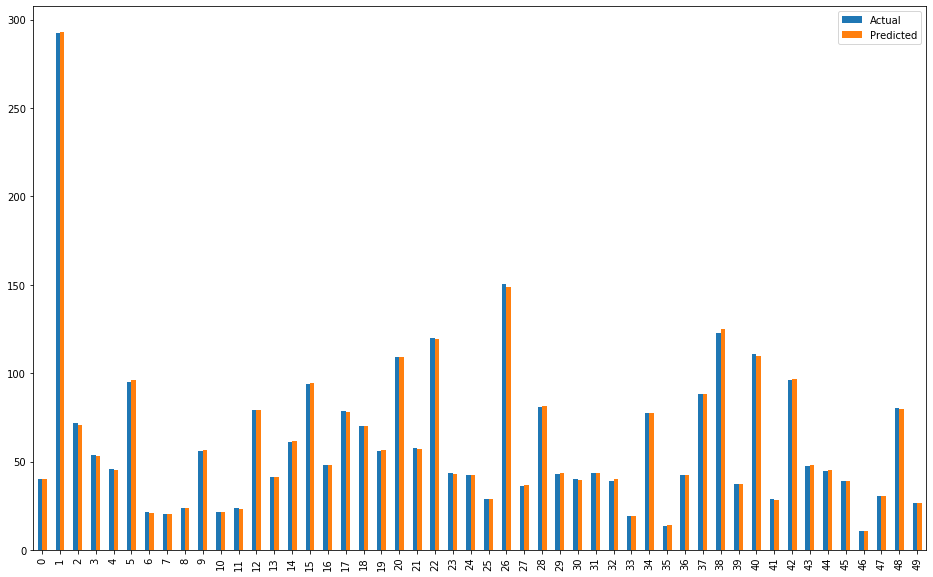

In [26]:
# Evaluating the model by comparing actual and predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_test.flatten()})

# Visually comparing some values
print(df)

# Considering only top 50 for plotting
df = df.head(50)
df.plot.bar(figsize=(16,10)) 

In [27]:
# We can say that the model's predicted prices are very close to the actual values in most cases.

In [28]:
# Answer 11

# Printing the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [29]:
# The flatten layer expects a 3-dimensional input and outputs 3 weights. So, the next layer has 3 input weights and 1 
# weight of connection with bias. As it has only 1 neuron, it gives us 1*(3+1) = 4 parameters.

In [30]:
# Answer 14

# Giving new inputs to predict the prices
new_data = pd.DataFrame([[198,195.99,199.99],
                        [40.330002,39.630001,40.549999],
                        [55.93,55.919998,56.810001],
                        [13.68,13.55,13.88],
                        [154.580002,152.770004,154.699997]], 
                        columns=['open','low','high'])
new_data = scaler.transform(new_data)
new_data = np.array(new_data)
new_data = new_data.reshape(new_data.shape[0], new_data.shape[1], 1)
actuals = [198,40.02,56.599998,13.79,153.149994]
predictions = model.predict(new_data)
for i in range(5):
    print('Expected = %.2f, Predicted = %.2f' % (actuals[i], predictions[i])) 

Expected = 198.00, Predicted = 198.07
Expected = 40.02, Predicted = 40.12
Expected = 56.60, Predicted = 56.34
Expected = 13.79, Predicted = 13.71
Expected = 153.15, Predicted = 153.89


In [31]:
# The model is predicting prices quite close to the actual prices. Nevertheless, the loss is around 0.74 which can be
# improved. Increasing the number of hidden layers, neurons, modifying the learning rate, adding momentum, etc. might
# help us in further reducing the loss.